In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [193]:
raw_df = pd.read_excel('IMB881.xlsx', sheet_name='Raw Data-Order and Sample')
cluster_df =  pd.read_excel('IMB881.xlsx', sheet_name='Data for Clustering')
datasample_df =  pd.read_excel('IMB881.xlsx', sheet_name='Data on Sample ONLY')

In [3]:
raw_df.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


In [87]:
raw_df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    9
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [4]:
cluster_df.head()


,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


In [88]:
raw_df['CustomerCode'].nunique()

46

In [89]:
correct_cus = np.array(cluster_df['Row Labels'])
correct_cus

array(['A-11', 'A-6', 'A-9', 'B-2', 'B-3', 'B-4', 'C-1', 'C-2', 'C-3',
       'CC', 'CTS', 'DR', 'E-2', 'F-1', 'F-6', 'G-1', 'G-4', 'H-1', 'H-2',
       'I-2', 'JL', 'K-2', 'K-3', 'L-2', 'L-3', 'L-4', 'L-5', 'M-1',
       'M-2', 'N-1', 'P-4', 'P-5', 'PC', 'PD', 'R-4', 'RC', 'S-2', 'S-3',
       'T-2', 'T-4', 'T-5', 'T-6', 'T-9', 'TGT', 'V-1'], dtype=object)

In [90]:
incorrect_cus = raw_df['CustomerCode'].unique()
incorrect_cus

array(['H-1', 'C-1', 'CC', 'M-1', 'E-2', 'B-3', 'G-1', 'M-2', 'P-5',
       'T-2', 'I-2', 'RC', 'T-6', 'JL', 'S-2', 'P-4', 'DR', 'PC', 'A-9',
       'PD', 'K-2', 'T-5', 'T-4', 'A-6', 'B-2', 'G-4', 'B-4', 'C-2',
       'L-2', 'F-1', 'F-2', 'H-2', 'C-3', 'R-4', 'V-1', 'L-5', 'TGT',
       'A-11', 'N-1', 'CTS', 'S-3', 'L-4', 'L-3', 'K-3', 'F-6', 'T-9'],
      dtype=object)

In [91]:
diff = np.setdiff1d(incorrect_cus,correct_cus)
diff

array(['F-2'], dtype=object)

In [92]:
cn = raw_df['CustomerCode'].eq('F-2').sum()
cn

3

In [93]:
raw_df = raw_df[raw_df['CustomerCode']!= 'F-2']

In [94]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18952 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18952 non-null  object        
 1   OrderCategory    18952 non-null  object        
 2   CustomerCode     18952 non-null  object        
 3   CountryName      18952 non-null  object        
 4   CustomerOrderNo  18943 non-null  object        
 5   Custorderdate    18952 non-null  datetime64[ns]
 6   UnitName         18952 non-null  object        
 7   QtyRequired      18952 non-null  int64         
 8   TotalArea        18952 non-null  float64       
 9   Amount           18952 non-null  float64       
 10  ITEM_NAME        18952 non-null  object        
 11  QualityName      18952 non-null  object        
 12  DesignName       18952 non-null  object        
 13  ColorName        18952 non-null  object        
 14  ShapeName        18952 non-null  object    

In [95]:
raw_df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    9
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [96]:
raw_df.dropna(subset=['CustomerOrderNo'], inplace=True)

In [97]:
raw_df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    0
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [85]:
raw_df.describe()

,Custorderdate,QtyRequired,TotalArea,Amount,AreaFt
count,18943,18943.000000,18943.000000,18943.000000,18943.000000
mean,2018-10-18 19:01:37.872564992,31.427599,36.163920,1658.304973,44.481773
min,2017-01-16 00:00:00,1.000000,0.040000,0.000000,0.444400
25%,2018-02-27 00:00:00,1.000000,4.000000,0.000000,8.437500
50%,2018-12-01 00:00:00,4.000000,15.000000,200.625000,35.000000
75%,2019-07-05 00:00:00,13.000000,54.000000,977.100000,64.736100
max,2020-02-14 00:00:00,6400.000000,1024.000000,599719.680000,645.722200
std,NaN,191.509399,45.179808,14059.336087,45.217722


In [98]:
raw_df.drop(['UnitName'], axis=1, inplace=True)
raw_df

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,6.0000,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.0000
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,9.0000,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.0000
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,54.0000,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.0000
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,5,54.0000,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.0000
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,5,71.2500,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18950,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,GREEN,REC,2.7778
18951,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.00,HAND TUFTED,TUFTED 60C ALL CUT,MONOGRAMMA,BLACK/BLACK,REC,2.7778
18952,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,IVORY,REC,2.7778
18953,Area Wise,Sample,A-9,USA,S 1280,2020-02-14,2,6.0000,0.00,HAND TUFTED,TUFTED 30C,9164 B,IVORY BLUE,REC,6.0000


In [99]:
customer_order_count = raw_df.groupby('CustomerCode')['CustomerOrderNo'].count()
customer_order_count


CustomerCode
A-11      44
A-6       25
A-9     1395
B-2       48
B-3       73
B-4       75
C-1     1097
C-2      295
C-3       87
CC      4132
CTS       20
DR        46
E-2      287
F-1       87
F-6        5
G-1       56
G-4        7
H-1      193
H-2      661
I-2      456
JL      1128
K-2      165
K-3        3
L-2       22
L-3       38
L-4        4
L-5       41
M-1     2499
M-2      332
N-1      416
P-4      112
P-5     1924
PC       155
PD       322
R-4       10
RC       265
S-2      168
S-3      138
T-2      596
T-4       59
T-5      566
T-6       40
T-9        2
TGT      785
V-1       64
Name: CustomerOrderNo, dtype: int64

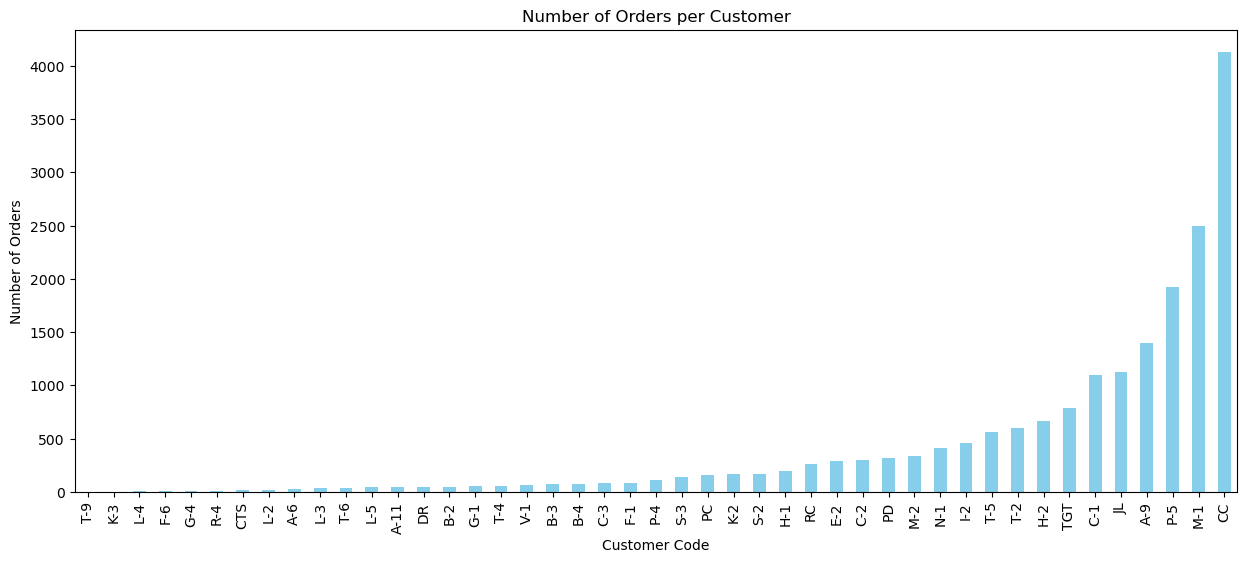

In [100]:
plt.figure(figsize=(15, 6))
customer_order_count.sort_values().plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Customer')
plt.xlabel('Customer Code')
plt.ylabel('Number of Orders')
plt.show()

In [101]:
amount_per_customer = raw_df.groupby('CustomerCode')['Amount'].sum()
amount_per_customer

CustomerCode
A-11    1.854041e+05
A-6     6.247460e+03
A-9     1.592080e+06
B-2     1.481116e+04
B-3     5.862686e+04
B-4     2.624250e+04
C-1     5.679768e+05
C-2     1.557123e+06
C-3     9.906235e+04
CC      1.475740e+05
CTS     2.380000e+04
DR      2.864812e+04
E-2     1.167783e+05
F-1     1.168382e+05
F-6     1.680000e+04
G-1     3.970124e+04
G-4     3.288752e+02
H-1     6.538379e+04
H-2     3.804801e+06
I-2     4.266260e+05
JL      1.231578e+06
K-2     5.987727e+04
K-3     4.099995e+02
L-2     2.150349e+04
L-3     9.075675e+04
L-4     4.423400e+04
L-5     3.588900e+05
M-1     1.959794e+06
M-2     3.342452e+05
N-1     9.493757e+05
P-4     2.925445e+05
P-5     3.059986e+06
PC      2.279496e+05
PD      4.045289e+05
R-4     1.010880e+04
RC      3.282907e+05
S-2     5.674273e+04
S-3     6.136800e+04
T-2     5.630988e+05
T-4     2.382410e+05
T-5     7.338329e+05
T-6     1.014880e+05
T-9     7.589700e+02
TGT     1.134105e+07
V-1     4.776128e+04
Name: Amount, dtype: float64

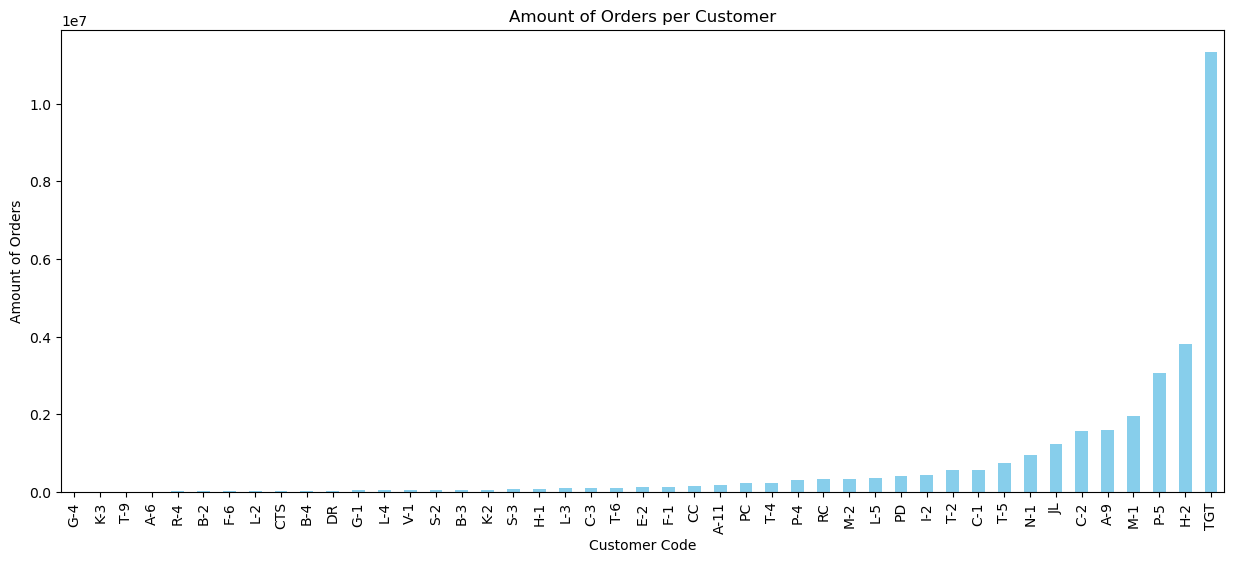

In [102]:
plt.figure(figsize=(15, 6))
amount_per_customer.sort_values().plot(kind='bar', color='skyblue')
plt.title('Amount of Orders per Customer')
plt.xlabel('Customer Code')
plt.ylabel('Amount of Orders')
plt.show()

In [103]:
TotalFt_per_Customer = raw_df.groupby('CustomerCode')['AreaFt'].sum()
TotalFt_per_Customer

CustomerCode
A-11      1563.5973
A-6       2086.0000
A-9      61435.9164
B-2       1802.5353
B-3       8452.5625
B-4       3244.2500
C-1      63729.4722
C-2      11297.8125
C-3       4016.0000
CC       93234.2365
CTS        654.0000
DR        3314.9444
E-2      18956.0000
F-1       3631.0000
F-6         55.0000
G-1       5348.0000
G-4        237.6181
H-1       9327.0625
H-2      24905.2154
I-2      16500.4408
JL       33543.1643
K-2      23216.1450
K-3         81.9999
L-2        882.0693
L-3       1781.0000
L-4        159.2500
L-5        647.1875
M-1     213493.5345
M-2       9344.1250
N-1       6077.9617
P-4       2771.8958
P-5      80924.6405
PC        8895.8750
PD       10052.3943
R-4        522.7430
RC       16455.2430
S-2       5751.9635
S-3       3189.6250
T-2      27439.4396
T-4       2855.1875
T-5      12607.8750
T-6       2120.0000
T-9        186.7708
TGT      41707.3734
V-1       4119.0967
Name: AreaFt, dtype: float64

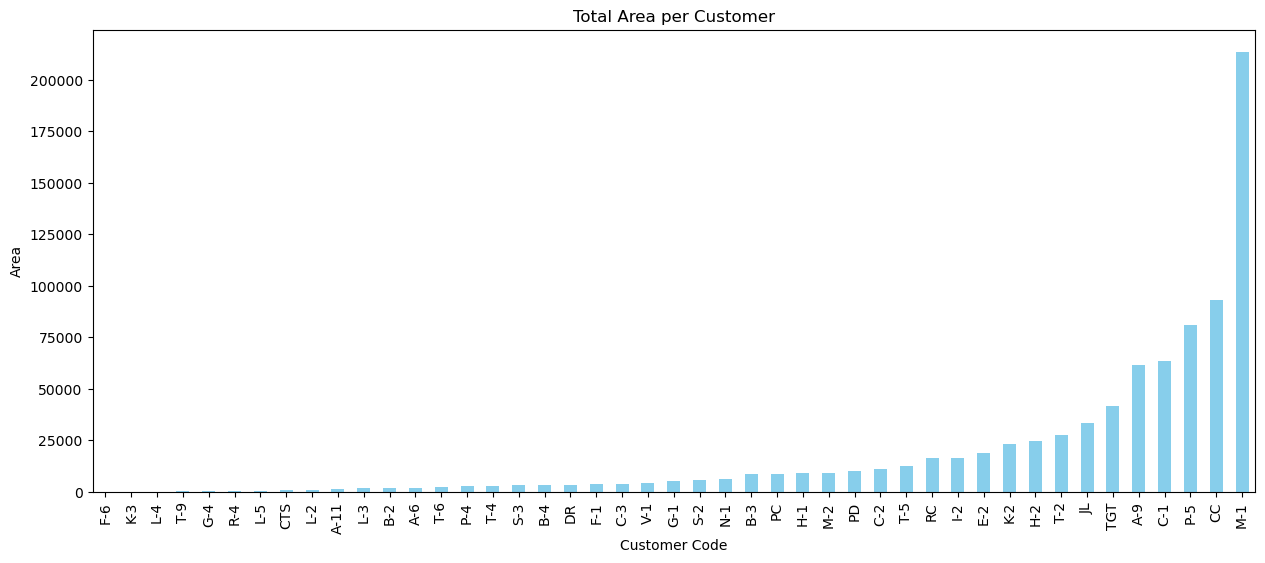

In [104]:
plt.figure(figsize=(15, 6))
TotalFt_per_Customer.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Area per Customer')
plt.xlabel('Customer Code')
plt.ylabel('Area')
plt.show()

In [105]:
sample_df = raw_df[raw_df['OrderCategory']=='Sample']
sample_df.reset_index(inplace=True)
sample_df

,index,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,78,Area Wise,Sample,CC,INDIA,SAMPLE_25-DEC2,2018-12-25,1,80.0000,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,AMARI TRELLIS,PETAL,REC,80.0000
1,81,Area Wise,Sample,M-1,USA,"REMAK-12824,26,93 Etc.",2018-12-04,1,80.0000,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,AMARI TRELLIS,IVORY/GREY,REC,80.0000
2,97,Area Wise,Sample,M-1,USA,"REMAK-12824,26,93 Etc.",2018-12-04,2,80.0000,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,ALIYA TRELLIS,PETAL,REC,80.0000
3,98,Area Wise,Sample,M-1,USA,SAMPLE_01-FEB,2019-02-01,1,80.0000,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,ALIYA TRELLIS,PETAL,REC,80.0000
4,104,Area Wise,Sample,M-1,USA,SAMPLE_26-DEC8,2018-12-26,1,80.0000,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,FLEUR TRELLIS,PETAL,REC,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,18950,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,GREEN,REC,2.7778
5813,18951,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.0,HAND TUFTED,TUFTED 60C ALL CUT,MONOGRAMMA,BLACK/BLACK,REC,2.7778
5814,18952,Area Wise,Sample,T-2,ITALY,S 1278,2020-02-13,1,0.2500,0.0,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY ALL CUT,MONOGRAMMA,IVORY,REC,2.7778
5815,18953,Area Wise,Sample,A-9,USA,S 1280,2020-02-14,2,6.0000,0.0,HAND TUFTED,TUFTED 30C,9164 B,IVORY BLUE,REC,6.0000


In [106]:
order_df = raw_df[raw_df['OrderCategory']=='Order']
order_df.reset_index(inplace=True)
order_df

,index,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,0,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,1,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,2,Area Wise,Order,H-1,USA,1873354,2017-01-16,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,3,Area Wise,Order,H-1,USA,1918436,2017-02-01,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,4,Area Wise,Order,H-1,USA,1873354,2017-01-16,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,18938,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,28,6.00,663.60,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC,6.00
13122,18939,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,10,22.50,888.70,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC,22.50
13123,18940,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,15,80.00,4740.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC,80.00
13124,18941,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,7,108.00,2986.20,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC,108.00


In [107]:
countries_df = raw_df.groupby('CountryName').agg({
            'CustomerOrderNo' : 'count',
            'TotalArea' : 'sum'
}).reset_index()
countries_df.rename(columns={ 'CustomerOrderNo' : 'OrderCount'}, inplace=True)
countries_df

,CountryName,OrderCount,TotalArea
0,AUSTRALIA,311,2308.1121
1,BELGIUM,346,1697.3663
2,BRAZIL,165,3854.7790
3,CANADA,287,18956.0000
4,CHINA,58,255.2987
5,INDIA,4132,71307.2955
6,ISRAEL,12,63.2852
7,ITALY,596,3357.8981
8,LEBANON,168,528.8725
9,ROMANIA,456,1548.0853


In [108]:
customer_df = raw_df.groupby('CustomerCode').agg({
            'CustomerOrderNo' : 'count',
            'TotalArea' : 'sum'
}).reset_index()
customer_df.rename(columns={ 'CustomerOrderNo' : 'OrderCount', 'Amount' : 'TotalAmount',  'AreaFt' : 'TotalArea'}, inplace=True)
customer_df

,CustomerCode,OrderCount,TotalArea
0,A-11,44,151.8600
1,A-6,25,2086.0000
2,A-9,1395,58794.7932
3,B-2,48,206.8987
4,B-3,73,8452.5625
5,B-4,75,3244.2500
6,C-1,1097,63729.4722
7,C-2,295,11261.6800
8,C-3,87,4016.0000
9,CC,4132,71307.2955


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

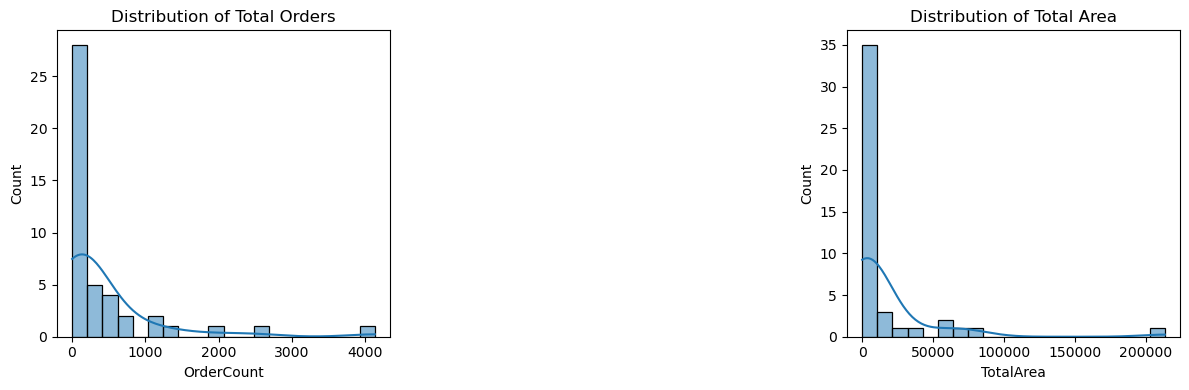

In [109]:
# Visualize the distribution of TotalOrders, TotalAmount, and TotalArea
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(customer_df['OrderCount'], bins=20, kde=True)
plt.title('Distribution of Total Orders')


plt.subplot(1, 3, 3)
sns.histplot(customer_df['TotalArea'], bins=20, kde=True)
plt.title('Distribution of Total Area')

plt.tight_layout()
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


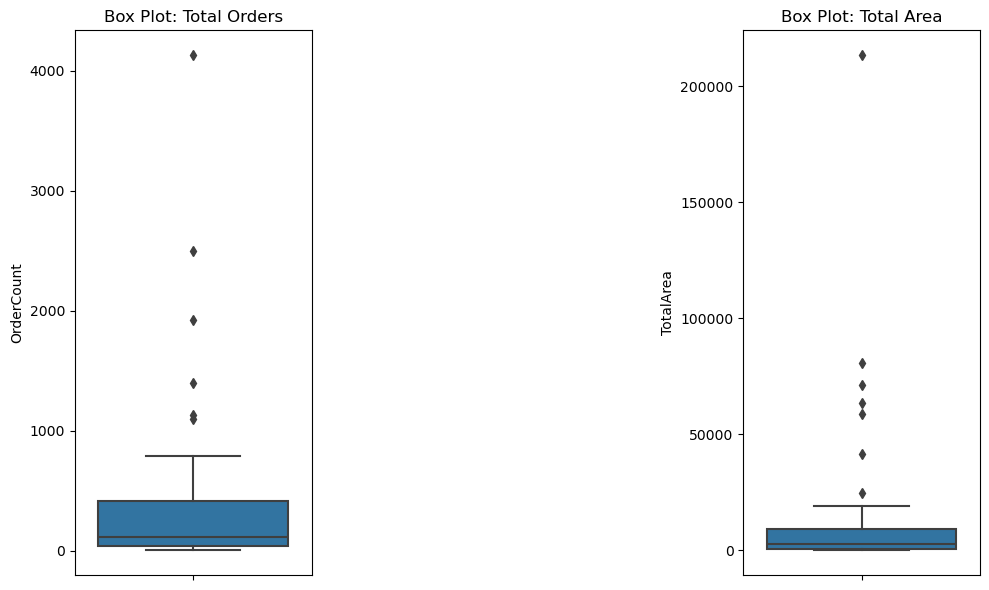

In [110]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=customer_df['OrderCount'])
plt.title('Box Plot: Total Orders')


plt.subplot(1, 3, 3)
sns.boxplot(y=customer_df['TotalArea'])
plt.title('Box Plot: Total Area')

plt.tight_layout()
plt.show()


In [111]:
# Clustering model for customers with Data for Clustering sheet
selected_columns = ['Row Labels', 'Sum of QtyRequired', 'Sum of Amount']
df_for_clustering = cluster_df[selected_columns]

In [112]:
df_for_clustering.drop('Row Labels', axis=1, inplace=True)

scaler = StandardScaler()
df_for_clustering_scaled = scaler.fit_transform(df_for_clustering)

# Choose the number of clusters
num_clusters = 5

# Fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(df_for_clustering_scaled)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8772\1179680827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering.drop('Row Labels', axis=1, inplace=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


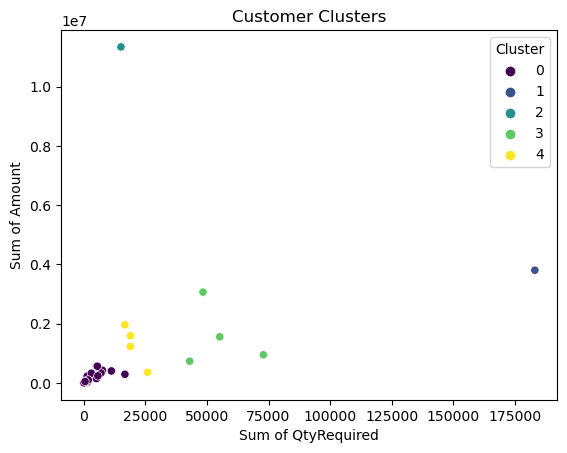

   Row Labels  Sum of QtyRequired  Sum of Amount  Cluster
0        A-11                2466   1.854041e+05        0
1         A-6                 131   6.247460e+03        0
2         A-9               18923   1.592080e+06        4
3         B-2                 624   1.481116e+04        0
4         B-3                 464   5.862687e+04        0
5         B-4                 692   2.624250e+04        0
6         C-1                5137   5.676207e+05        0
7         C-2               55172   1.557123e+06        3
8         C-3                1566   9.906235e+04        0
9          CC                5077   1.475740e+05        0
10        CTS                 565   2.380000e+04        0
11         DR                 149   2.864812e+04        0
12        E-2                 581   1.167783e+05        0
13        F-1                1158   1.168382e+05        0
14        F-6                1400   1.680000e+04        0
15        G-1                 146   3.970124e+04        0
16        G-4 

In [113]:
# Visualize the clusters
sns.scatterplot(data=cluster_df, x='Sum of QtyRequired', y='Sum of Amount', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()

# Display the DataFrame with the assigned cluster labels
print(cluster_df[['Row Labels', 'Sum of QtyRequired', 'Sum of Amount', 'Cluster']])


In [114]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_columns = ['Row Labels', 'Sum of QtyRequired', 'Sum of Amount']
df_for_clustering = cluster_df[selected_columns]

df_for_clustering.columns = ['CustomerCode', 'QtyRequired', 'Amount']

df_for_clustering.drop('CustomerCode', axis=1, inplace=True)

# Standardize only the numeric columns
numeric_features = ['QtyRequired', 'Amount']
scaler = StandardScaler()
df_for_clustering_scaled = scaler.fit_transform(df_for_clustering[numeric_features])

# Choose the number of clusters
num_clusters = 5

# Fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(df_for_clustering_scaled)

# Define the desired sequence of cluster assignments
desired_sequence = [0, 4, 3, 1, 2]  

# Create a mapping dictionary
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(desired_sequence)}

# Map the clusters to the desired sequence
cluster_df['Cluster'] = cluster_df['Cluster'].map(cluster_mapping)

print(cluster_df)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8772\1002989660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering.drop('CustomerCode', axis=1, inplace=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and w

   Row Labels  Sum of QtyRequired  Sum of TotalArea  Sum of Amount   DURRY  \
0        A-11                2466          139.5900   1.854041e+05    1021   
1         A-6                 131         2086.0000   6.247460e+03       0   
2         A-9               18923        53625.6544   1.592080e+06    3585   
3         B-2                 624          202.8987   1.481116e+04     581   
4         B-3                 464         8451.5625   5.862687e+04       0   
5         B-4                 692         3244.2500   2.624250e+04      80   
6         C-1                5137        62763.0555   5.676207e+05     288   
7         C-2               55172         9510.0000   1.557123e+06   37042   
8         C-3                1566         4016.0000   9.906235e+04    1240   
9          CC                5077         7695.9930   1.475740e+05       4   
10        CTS                 565          420.0000   2.380000e+04       0   
11         DR                 149          305.9765   2.864812e+

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


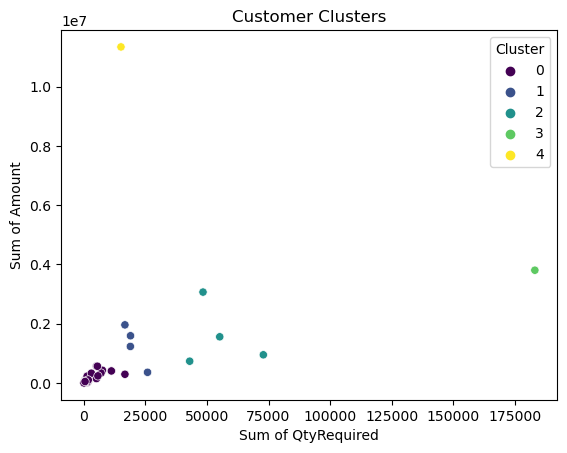

   Row Labels  Sum of QtyRequired  Sum of Amount  Cluster
0        A-11                2466   1.854041e+05        0
1         A-6                 131   6.247460e+03        0
2         A-9               18923   1.592080e+06        1
3         B-2                 624   1.481116e+04        0
4         B-3                 464   5.862687e+04        0
5         B-4                 692   2.624250e+04        0
6         C-1                5137   5.676207e+05        0
7         C-2               55172   1.557123e+06        2
8         C-3                1566   9.906235e+04        0
9          CC                5077   1.475740e+05        0
10        CTS                 565   2.380000e+04        0
11         DR                 149   2.864812e+04        0
12        E-2                 581   1.167783e+05        0
13        F-1                1158   1.168382e+05        0
14        F-6                1400   1.680000e+04        0
15        G-1                 146   3.970124e+04        0
16        G-4 

In [115]:
# Visualize the clusters
sns.scatterplot(data=cluster_df, x='Sum of QtyRequired', y='Sum of Amount', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()

# Display the DataFrame with the assigned cluster labels
print(cluster_df[['Row Labels', 'Sum of QtyRequired', 'Sum of Amount', 'Cluster']])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8772\3433911177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering.drop('Row Labels', axis=1, inplace=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

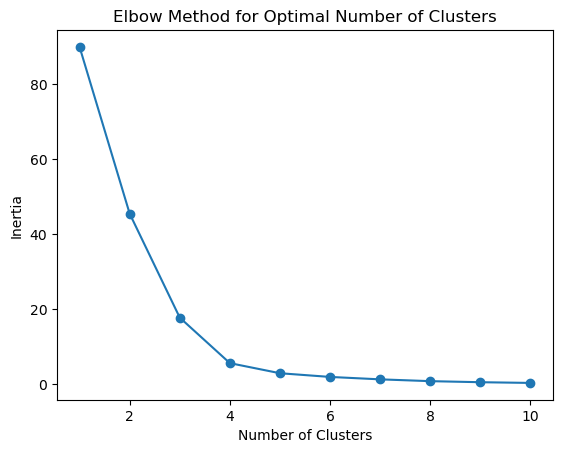

In [116]:
# Create a DataFrame with the relevant columns
selected_columns = ['Row Labels', 'Sum of QtyRequired', 'Sum of Amount']
df_for_clustering = cluster_df[selected_columns]
df_for_clustering.drop('Row Labels', axis=1, inplace=True)

# Standardize the data
scaler = StandardScaler()
df_for_clustering_scaled = scaler.fit_transform(df_for_clustering)

# Perform hyperparameter tuning using the elbow method
inertia = []

# Try different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [132]:
# Collaborative Filtering recommendation system - User Based

from sklearn.metrics.pairwise import cosine_similarity
colab_filter_df = order_df[['CustomerCode', 'Amount','ITEM_NAME', 'QualityName', 'DesignName', 'ColorName','ShapeName']]
colab_filter_df.isnull().any()


CustomerCode    False
Amount          False
ITEM_NAME       False
QualityName     False
DesignName      False
ColorName       False
ShapeName       False
dtype: bool

In [133]:
colab_filter_df

,CustomerCode,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,H-1,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
1,H-1,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
2,H-1,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
3,H-1,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
4,H-1,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
...,...,...,...,...,...,...,...
13121,A-9,663.60,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC
13122,A-9,888.70,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC
13123,A-9,4740.00,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC
13124,A-9,2986.20,HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC


In [135]:
# Create a user-item matrix
user_item_matrix = pd.pivot_table(colab_filter_df, values='Amount', index='CustomerCode', columns=['ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName'], fill_value=0)


In [136]:
user_item_matrix

ITEM_NAME                              -           DOUBLE BACK                \
QualityName  HANDWOVEN 8C FELTED W/V+V/V       D.B. 30C MS W/V                 
DesignName                  CHUNKY BRAID            CUT & BIND                 
ColorName                         SILVER WHITE          CARBON  CREAM   GREY   
ShapeName                            REC   REC             REC    REC    REC   
CustomerCode                                                                   
A-11                                 0.0   0.0             0.0    0.0    0.0   
A-6                                  0.0   0.0             0.0    0.0    0.0   
A-9                                  0.0   0.0             0.0    0.0    0.0   
B-2                                  0.0   0.0             0.0    0.0    0.0   
B-3                                  0.0   0.0             0.0    0.0    0.0   
B-4                                  0.0   0.0             0.0    0.0    0.0   
C-1                                  0.0   0.0             0.0    0.0    0.0   
C-2                                  0.0   0.0             0.0    0.0    0.0   
C-3                                  0.0   0.0             0.0    0.0    0.0   
CC                                   0.0   0.0             0.0    0.0    0.0   
CTS                                  0.0   0.0             0.0    0.0    0.0   
DR                                   0.0   0.0             0.0    0.0    0.0   
E-2                                  0.0   0.0           564.0    0.0    0.0   
F-1                                  0.0   0.0             0.0    0.0    0.0   
F-6                                  0.0   0.0             0.0    0.0    0.0   
G-1                                  0.0   0.0             0.0    0.0    0.0   
G-4                                  0.0   0.0             0.0    0.0    0.0   
H-1                                240.0   0.0             0.0    0.0    0.0   
H-2                                  0.0   0.0             0.0    0.0    0.0   
I-2                                  0.0   0.0             0.0  852.0    0.0   
JL                                   0.0  94.2             0.0    0.0    0.0   
K-2                                  0.0   0.0             0.0    0.0    0.0   
K-3                                  0.0   0.0             0.0    0.0    0.0   
L-2                                  0.0   0.0             0.0    0.0    0.0   
L-3                                  0.0   0.0             0.0    0.0    0.0   
L-4                                  0.0   0.0             0.0    0.0    0.0   
L-5                                  0.0   0.0             0.0    0.0    0.0   
M-1                                  0.0  75.0             0.0  720.0  720.0   
M-2                                  0.0   0.0             0.0    0.0    0.0   
N-1                                  0.0   0.0             0.0    0.0    0.0   
P-4                                  0.0   0.0             0.0    0.0    0.0   
P-5                                  0.0   0.0             0.0    0.0    0.0   
PC                                   0.0   0.0             0.0    0.0    0.0   
PD                                   0.0   0.0             0.0    0.0    0.0   
R-4                                  0.0   0.0             0.0    0.0    0.0   
RC                                   0.0   0.0             0.0    0.0    0.0   
S-2                                  0.0   0.0             0.0    0.0    0.0   
S-3                                  0.0   0.0             0.0    0.0    0.0   
T-2                                  0.0   0.0             0.0    0.0    0.0   
T-4                                  0.0   0.0             0.0    0.0    0.0   
T-5                                  0.0   0.0             0.0    0.0    0.0   
T-6                                  0.0   0.0             0.0    0.0    0.0   
T-9                                  0.0   0.0             0.0    0.0    0.0   
TGT                                  0.0   0.0             0.0    0.0    0.0   


In [137]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [138]:
# Convert the similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df

CustomerCode,A-11,A-6,A-9,B-2,B-3,B-4,C-1,C-2,C-3,CC,...,RC,S-2,S-3,T-2,T-4,T-5,T-6,T-9,TGT,V-1
CustomerCode,,,,,,,,,,,,,,,,,,,,,
A-11,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A-6,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A-9,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
B-2,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003401,0.0,0.0
B-3,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
B-4,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
C-1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.012895,0.000184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
C-2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001477,0.000000,0.000000,0.0,0.0
C-3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [214]:

# Function to get recommendations for a given customer
def get_recommendations(customer_code, user_similarity_df, user_item_matrix):
    similar_users = user_similarity_df[customer_code].sort_values(ascending=False)[1:]  # Exclude the customer itself
    recommendations = user_item_matrix.loc[similar_users.index].sum().sort_values(ascending=False)
    return recommendations


In [215]:
# Example: Get recommendations for a specific customer
customer_code = 'T-5'
recommendations = get_recommendations(customer_code, user_similarity_df, user_item_matrix)
print(recommendations.head())


ITEM_NAME    QualityName                   DesignName                    ColorName  ShapeName
-            HANDWOVEN 8C FELTED W/V+V/V   CHUNKY BRAID                  SILVER     REC          0.0
HAND TUFTED  TUFTED 60C LOOP/CUT           AUDRINA RUG [10411]           IVORY      REC          0.0
             TUFTED 60C NZ BLEND ALL LOOP  GOLDEN PAISLEY (NZ BLEND)     MULTI      REC          0.0
             TUFTED 60C NZ ALL LOOP        GOLDEN PAISLEY (NZ)           MULTI      REC          0.0
                                           GOLDEN PAISLEY (NZ OPTION 2)  MULTI      ROUND        0.0
dtype: float64
